 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [200]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [201]:
# Reading whale returns
csvpath_whale = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(csvpath_whale, index_col = "Date", infer_datetime_format= True, parse_dates= True) 
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [202]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [203]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [204]:
# Reading algorithmic returns
csvpath_algo = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(csvpath_algo, index_col= "Date", infer_datetime_format= True, parse_dates= True)

In [205]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [206]:
# Drop nulls
algo_df.dropna(inplace = True)
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [207]:
# Reading S&P 500 Closing Prices
csvpath_sp500 = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(csvpath_sp500, index_col = "Date", infer_datetime_format = True, parse_dates = True)

In [208]:
sp500_df.index = pd.to_datetime(sp500_df.index)

In [209]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [210]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")

/home/qian/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [211]:
# Calculate Daily Returns
sp500_df["Close"] = sp500_df["Close"].pct_change()

In [212]:
# Drop nulls
sp500_df.dropna(inplace = True)

In [213]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns = ["SP500"]

In [214]:
algo_df_sliced = algo_df.loc['20150303':'20190423']
algo_df_sliced

Algo 1    Algo 2
Date                          
2015-03-03 -0.001942 -0.000949
2015-03-04 -0.008589  0.002416
2015-03-05 -0.000955  0.004323
2015-03-06 -0.004957 -0.011460
2015-03-09 -0.005447  0.001303
...              ...       ...
2019-04-16 -0.006945  0.002899
2019-04-17 -0.010301 -0.005228
2019-04-18 -0.000588 -0.001229
2019-04-22  0.000677 -0.001936
2019-04-23  0.004969  0.009622

[1043 rows x 2 columns]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [215]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_df_sliced = whale_df.loc['20150302':'20190423']
algo_df_sliced = algo_df.loc['20150302':'20190423']
sp500_df_sliced = sp500_df.loc['20150302':'20190423']

combined = pd.concat([whale_df_sliced, algo_df_sliced, sp500_df_sliced], join = "inner", axis = 1)
combined.head()

/home/qian/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

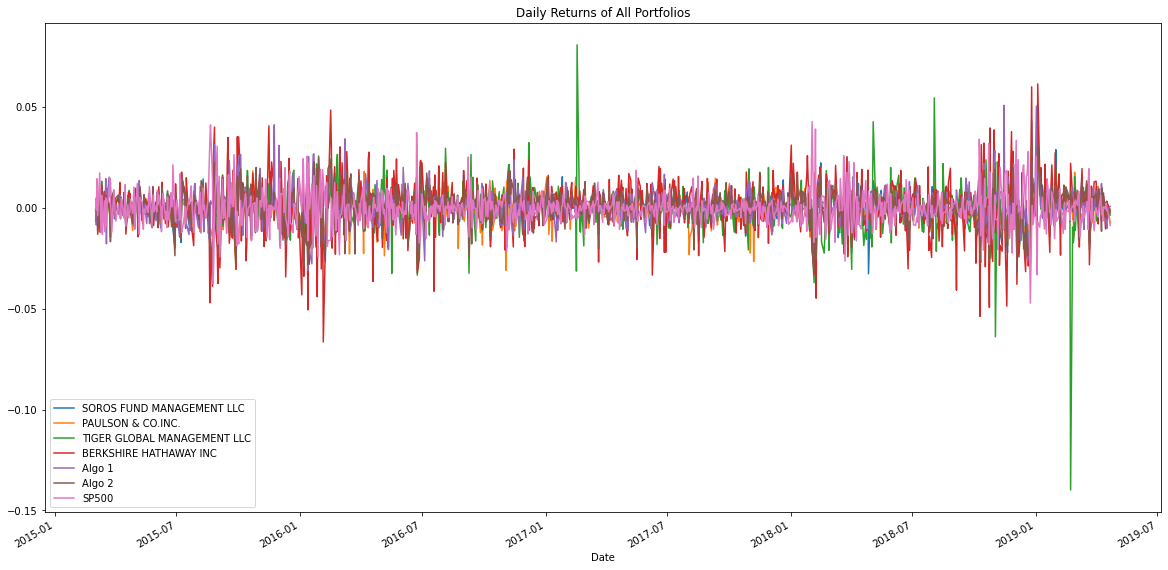

In [216]:
# Plot daily returns of all portfolios
combined.plot(figsize = [20, 10], title = "Daily Returns of All Portfolios")

In [217]:
combined.mean()

SOROS FUND MANAGEMENT LLC      0.000171
PAULSON & CO.INC.             -0.000217
TIGER GLOBAL MANAGEMENT LLC   -0.000089
BERKSHIRE HATHAWAY INC         0.000494
Algo 1                         0.000658
Algo 2                         0.000254
SP500                         -0.000281
dtype: float64

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

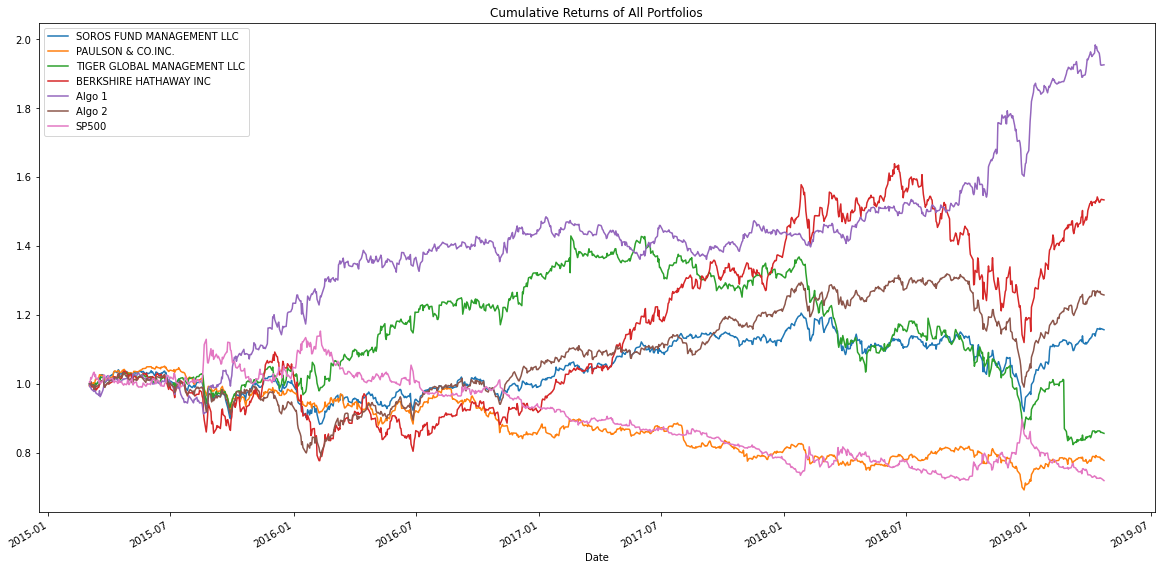

In [218]:
# Calculate cumulative returns of all portfolios
combined_cum = ( 1 + combined).cumprod()
# Plot cumulative returns
combined_cum.plot(figsize = [20, 10], title = "Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

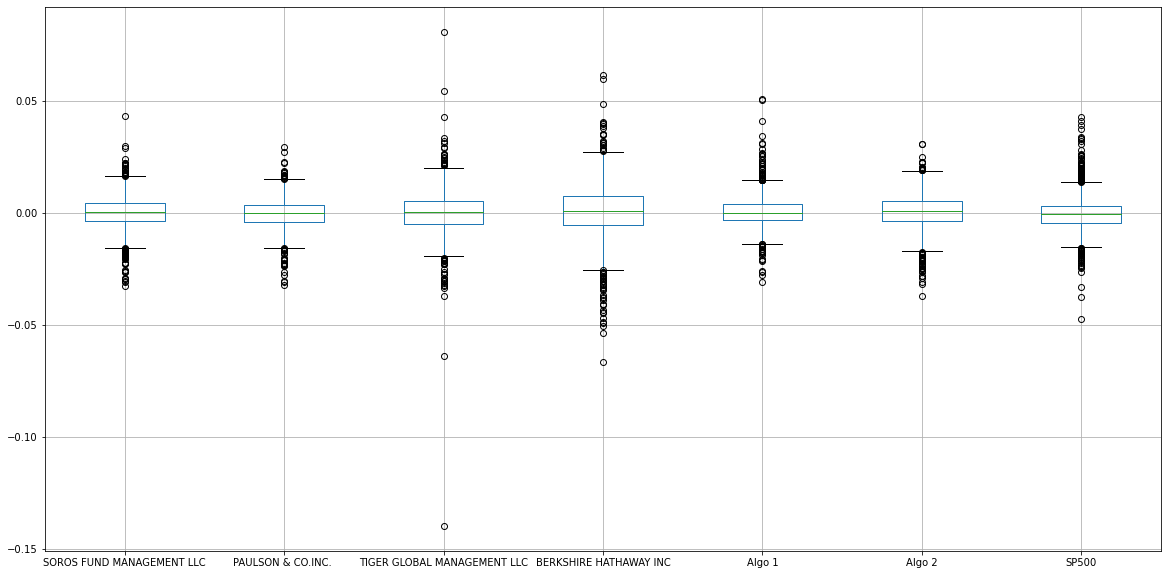

In [219]:
# Box plot to visually show risk
combined.boxplot(figsize = [20, 10])

### Calculate Standard Deviations

In [220]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [221]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_std["SP500"]
sp500_std
# Determine which portfolios are riskier than the S&P 500
combined_dic = combined_std.to_dict()
riksy_portfolio = []
for key, value in combined_dic.items():
    if value > sp500_std:
        riksy_portfolio.append(key)
riksy_portfolio

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

### Calculate the Annualized Standard Deviation

In [222]:
# Calculate the annualized standard deviation (252 trading days)
combined_std_annual = combined_std * 252
combined_std_annual

SOROS FUND MANAGEMENT LLC      1.989840
PAULSON & CO.INC.              1.770430
TIGER GLOBAL MANAGEMENT LLC    2.746121
BERKSHIRE HATHAWAY INC         3.255526
Algo 1                         1.920918
Algo 2                         2.101991
SP500                          2.163896
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

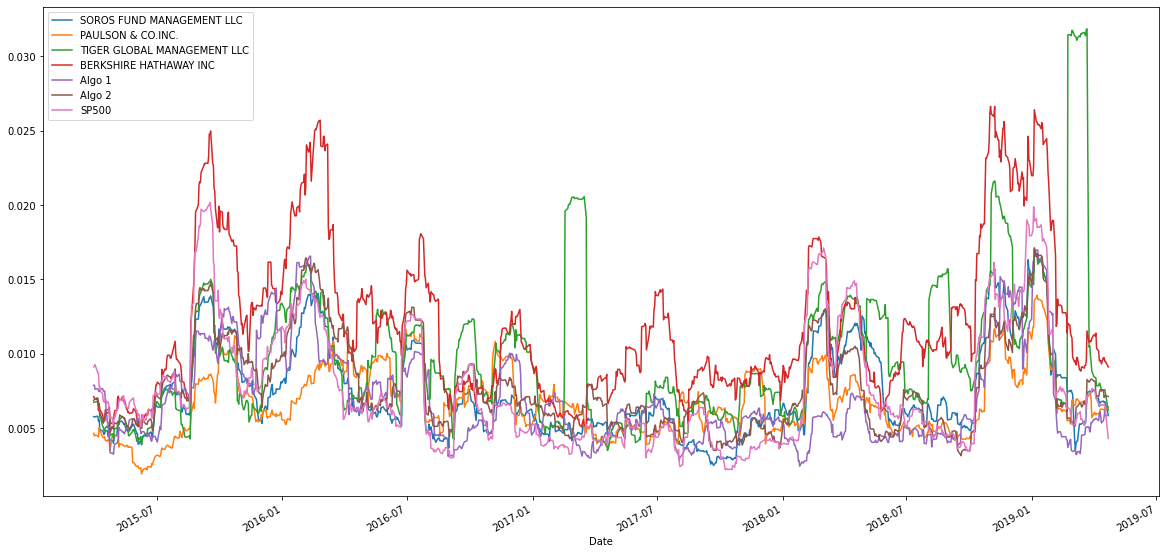

In [223]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined.rolling(window = 21).std()
# Plot the rolling standard deviation
combined.rolling(window = 21).std().plot(figsize = [20, 10])

### Calculate and plot the correlation

In [224]:
# Calculate the correlation
combined_corr = combined.corr()
# Display de correlation matrix
combined_corr

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
SP500                                         0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
SP500                                          -0.001505   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
SP500                                     -0.013856 -0.033963 -0.002192   

                                SP500  
SOROS FUND MANAGEMENT LLC    0.000574  
PAULSON & CO.INC.            0.013549  
TIGER GLOBAL MANAGEMENT LLC -0.001505  
BERKSHIRE HATHAWAY INC      -0.013856  
Algo 1                      -0.033963  
Algo 2                      -0.002192  
SP500                        1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta Trend'}, xlabel='Date'>

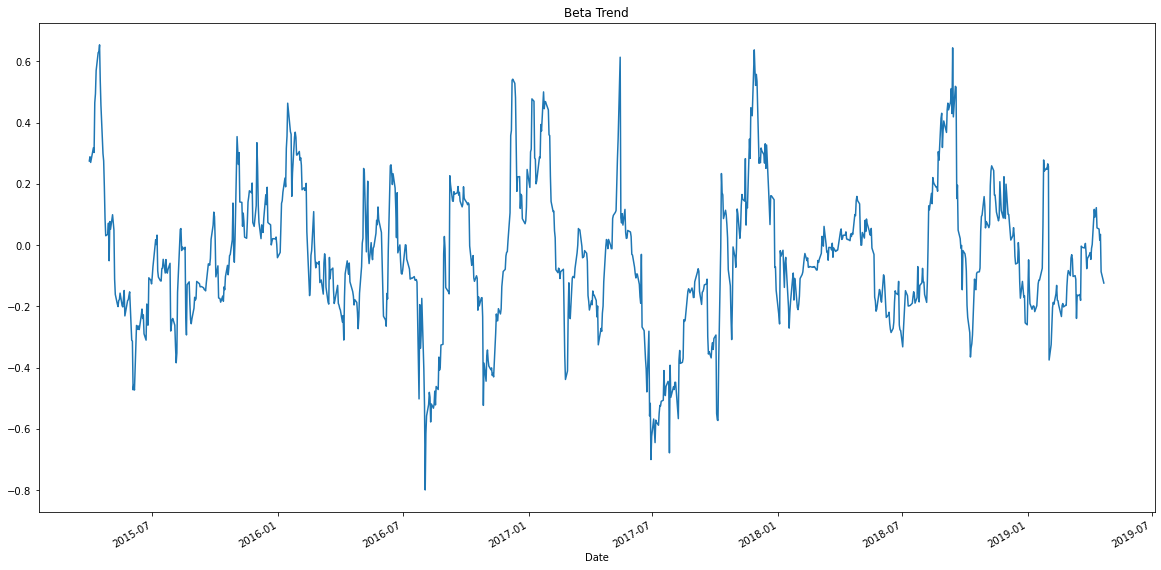

In [225]:
# Calculate covariance of Algo1
combined_cov = combined["Algo 1"].rolling(window = 21).cov(combined["SP500"])
# Calculate variance of S&P 500
sp500_var = combined["SP500"].rolling(window = 21).var()
# Computing beta
beta = combined_cov / sp500_var
# Plot beta trend
beta.plot(title = "Beta Trend", figsize = [20, 10])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [226]:
combined.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
SP500                          float64
dtype: object

In [227]:
# Use `ewm` to calculate the rolling window
# combined["ewm"] = combined.ewm(halflife = 21)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [228]:
# Annualized Sharpe Ratios
combined_sharpratio = ((combined.rolling(window = 21).mean()/combined_rolling_std))**252

In [229]:
combined_sharpratio.mean()

SOROS FUND MANAGEMENT LLC      1.670404e-46
PAULSON & CO.INC.              2.509745e-51
TIGER GLOBAL MANAGEMENT LLC    4.082308e-48
BERKSHIRE HATHAWAY INC         1.961755e-38
Algo 1                         3.101992e-52
Algo 2                         5.041423e-19
SP500                          4.122903e-38
dtype: float64

In [230]:
# Visualize the sharpe ratios as a bar plot
# combined_sharpratio.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [231]:
# From the sharpe ratio, only Algo 2 outperformed the market in terms of the average return earned in excess of the risk-free rate per unit of total risk.
# From the cumulative returns, Algo 1, BERKSHIRE HATHAWAY INC, and Algo 2 ranked the top three portfolios throughout the five years. However, BERKSHIRE HATHAWAY INC has the highest standard deviation among all the portfolios which refers to the highest risks. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [232]:
# Reading data from 1st stock
csvpath_aapl = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(csvpath_aapl, infer_datetime_format = True, parse_dates = True, index_col= "Trade DATE")
aapl_df.drop(columns = ["Symbol"], inplace = True)
aapl_df = aapl_df.loc["20180513" : "20190422"]

In [233]:
# Reading data from 2nd stock
csvpath_cost = Path("../Starter_Code/Resources/cost_historical.csv")
cost_df = pd.read_csv(csvpath_cost, infer_datetime_format = True, parse_dates = True, index_col= "Trade DATE")
cost_df.drop(columns = ["Symbol"], inplace = True)
cost_df = cost_df.loc["20180513" : "20190422"]

In [234]:
# Reading data from 3rd stock
csvpath_goog = Path("../Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(csvpath_goog, infer_datetime_format = True, parse_dates = True, index_col= "Trade DATE")
goog_df.drop(columns = ["Symbol"], inplace = True)
goog_df = goog_df.loc["20180513" : "20190422"]

In [235]:
# Slice sp500
sp500_df_cus_sliced = sp500_df.loc["20180513":"20190422"]

In [236]:
# Combine all stocks in a single DataFrame
combined_cus = pd.concat([aapl_df, cost_df, goog_df], axis = 1)
combined_cus

NOCP    NOCP     NOCP
Trade DATE                         
2019-04-22  204.53  243.42  1248.84
2019-04-18  203.86  245.81  1236.37
2019-04-17  203.13  245.56  1236.34
2019-04-16  199.25  245.34  1227.13
2019-04-15  199.23  246.33  1221.10
...            ...     ...      ...
2018-05-18  186.31  198.96  1066.36
2018-05-17  186.99  199.60  1078.59
2018-05-16  188.18  198.71  1081.77
2018-05-15  186.44  195.48  1079.23
2018-05-14  188.15  195.88  1100.20

[236 rows x 3 columns]

In [237]:
# Reset Date index
combined_cus.index

DatetimeIndex(['2019-04-22', '2019-04-18', '2019-04-17', '2019-04-16',
               '2019-04-15', '2019-04-12', '2019-04-11', '2019-04-10',
               '2019-04-09', '2019-04-08',
               ...
               '2018-05-25', '2018-05-24', '2018-05-23', '2018-05-22',
               '2018-05-21', '2018-05-18', '2018-05-17', '2018-05-16',
               '2018-05-15', '2018-05-14'],
              dtype='datetime64[ns]', name='Trade DATE', length=236, freq=None)

In [238]:
# Reorganize portfolio data by having a column per symbol
combined_cus.columns = ["aapl", "cost", "goog"]

In [240]:
# Calculate daily returns
combined_cus_daily = combined_cus.pct_change()
# Drop NAs
combined_cus_daily.dropna(inplace = True)
# Display sample data
combined_cus_daily

aapl      cost      goog
Trade DATE                              
2019-04-18 -0.003276  0.009818 -0.009985
2019-04-17 -0.003581 -0.001017 -0.000024
2019-04-16 -0.019101 -0.000896 -0.007449
2019-04-15 -0.000100  0.004035 -0.004914
2019-04-12 -0.001807 -0.017781 -0.002645
...              ...       ...       ...
2018-05-18 -0.007035 -0.003306 -0.012246
2018-05-17  0.003650  0.003217  0.011469
2018-05-16  0.006364 -0.004459  0.002948
2018-05-15 -0.009246 -0.016255 -0.002348
2018-05-14  0.009172  0.002046  0.019431

[235 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [241]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = combined_cus_daily.dot(weights)

# Display sample data
portfolio_return

Trade DATE
2019-04-18   -0.001148
2019-04-17   -0.001541
2019-04-16   -0.009149
2019-04-15   -0.000326
2019-04-12   -0.007411
                ...   
2018-05-18   -0.007529
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
Length: 235, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [242]:
# Join your returns DataFrame to the original returns DataFrame
combined["Portfolio"] = portfolio_return

In [243]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined = combined[combined['Portfolio'].notna()]

### Calculate the Annualized Standard Deviation

In [259]:
# Calculate the annualized `std`
combined.std()

SOROS FUND MANAGEMENT LLC      0.009266
PAULSON & CO.INC.              0.007365
TIGER GLOBAL MANAGEMENT LLC    0.014701
BERKSHIRE HATHAWAY INC         0.015612
Algo 1                         0.008455
Algo 2                         0.008805
SP500                          0.009609
Portfolio                      0.013463
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

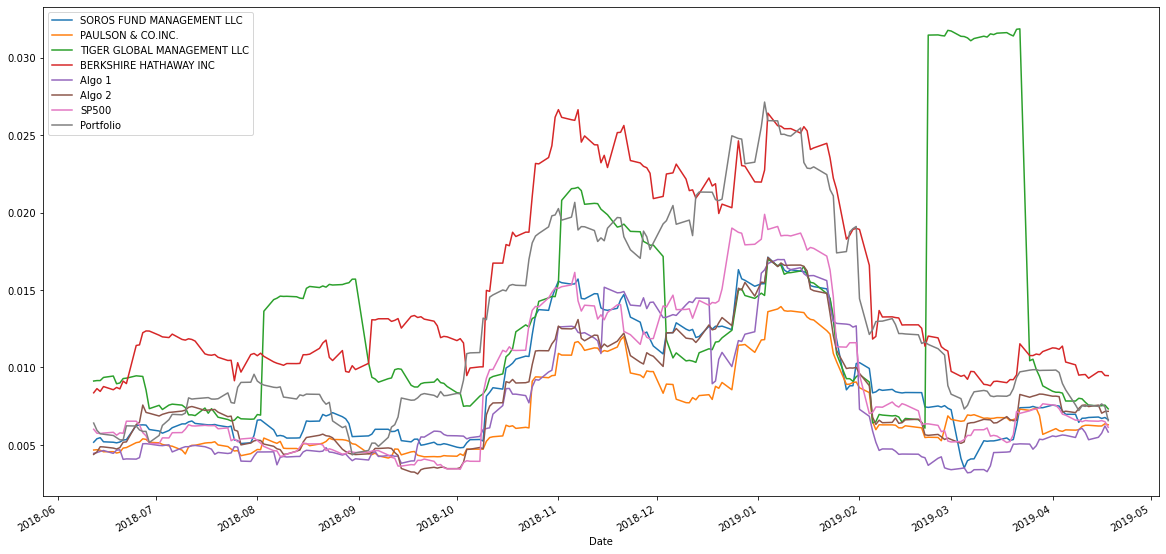

In [262]:
# Calculate rolling standard deviation
combined.rolling(window = 21).std()
# Plot rolling standard deviation
combined.rolling(window = 21).std().plot(figsize = [20, 10])

### Calculate and plot the correlation

In [261]:
# Calculate and plot the correlation
combined.corr()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.792376   
PAULSON & CO.INC.                             0.792376            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.477736            0.485181   
BERKSHIRE HATHAWAY INC                        0.816269            0.651489   
Algo 1                                        0.336918            0.361318   
Algo 2                                        0.862556            0.784706   
SP500                                        -0.029459           -0.063930   
Portfolio                                     0.060640            0.022122   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.477736   
PAULSON & CO.INC.                               0.485181   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.324274   
Algo 1                                          0.113644   
Algo 2                                          0.408302   
SP500                                           0.005205   
Portfolio                                       0.035420   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.816269  0.336918  0.862556   
PAULSON & CO.INC.                          0.651489  0.361318  0.784706   
TIGER GLOBAL MANAGEMENT LLC                0.324274  0.113644  0.408302   
BERKSHIRE HATHAWAY INC                     1.000000  0.325976  0.782073   
Algo 1                                     0.325976  1.000000  0.364454   
Algo 2                                     0.782073  0.364454  1.000000   
SP500                                     -0.039187 -0.054744 -0.043453   
Portfolio                                  0.006535  0.073257  0.039177   

                                SP500  Portfolio  
SOROS FUND MANAGEMENT LLC   -0.029459   0.060640  
PAULSON & CO.INC.           -0.063930   0.022122  
TIGER GLOBAL MANAGEMENT LLC  0.005205   0.035420  
BERKSHIRE HATHAWAY INC      -0.039187   0.006535  
Algo 1                      -0.054744   0.073257  
Algo 2                      -0.043453   0.039177  
SP500                        1.000000   0.869587  
Portfolio                    0.869587   1.000000

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

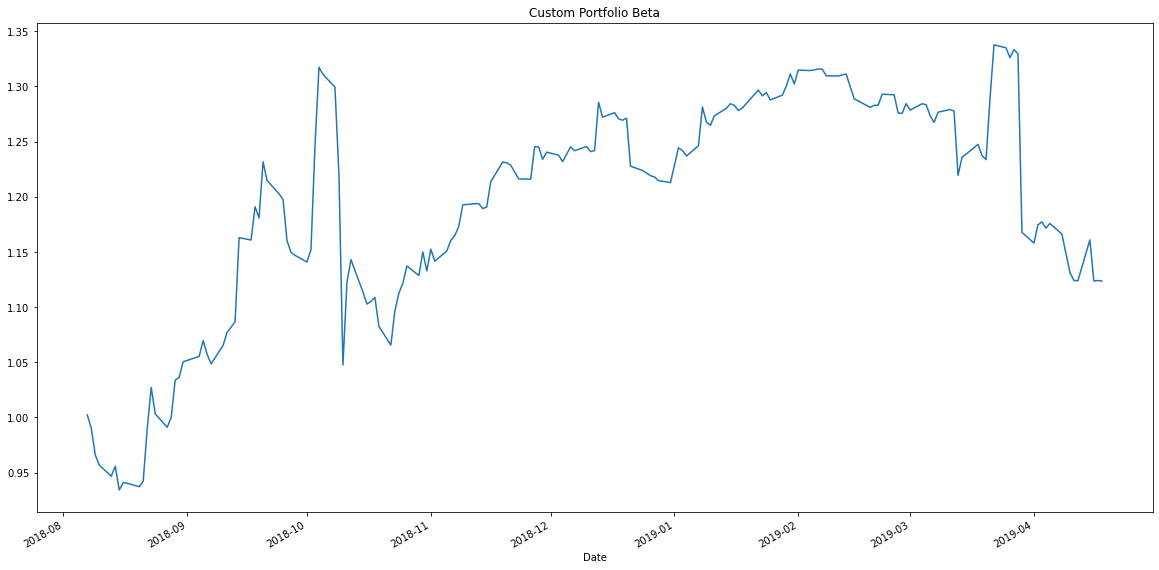

In [250]:
# Calculate and plot Beta
covariance = combined["Portfolio"].rolling(window=60).cov(combined["SP500"])
variance = combined["SP500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [256]:
# Calculate Annualized Sharpe Ratios
combined_sharpratio = (combined.mean()/combined.std())*np.sqrt(252)

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios'}>

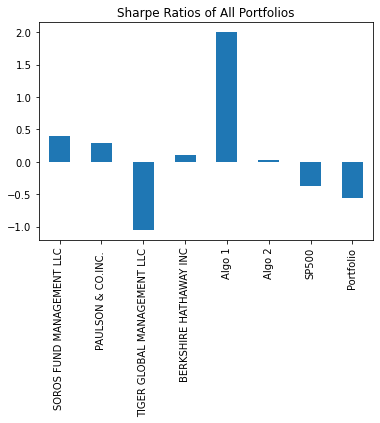

In [258]:
# Visualize the sharpe ratios as a bar plot
combined_sharpratio.plot(kind = "bar", title = "Sharpe Ratios of All Portfolios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# The customised portfolio has a low sharpe ratio and a higher standard deviation than sp500, the algorithm portfolios, and most whale portfolios. However, the portfolio is mostly correlated to the market comparing to the rest of the portfolios.